### GOAL OF THE PROJECT

- Our goal is to be able to predict the sales that we will have in a given period based on spending on ads in the 3 major networks that the company Hashtag invests: TV, Newspaper and Radio

### Importing Dataframe

In [1]:
import pandas as pd

df = pd.read_csv("advertising.csv")
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Exploratory Analysis

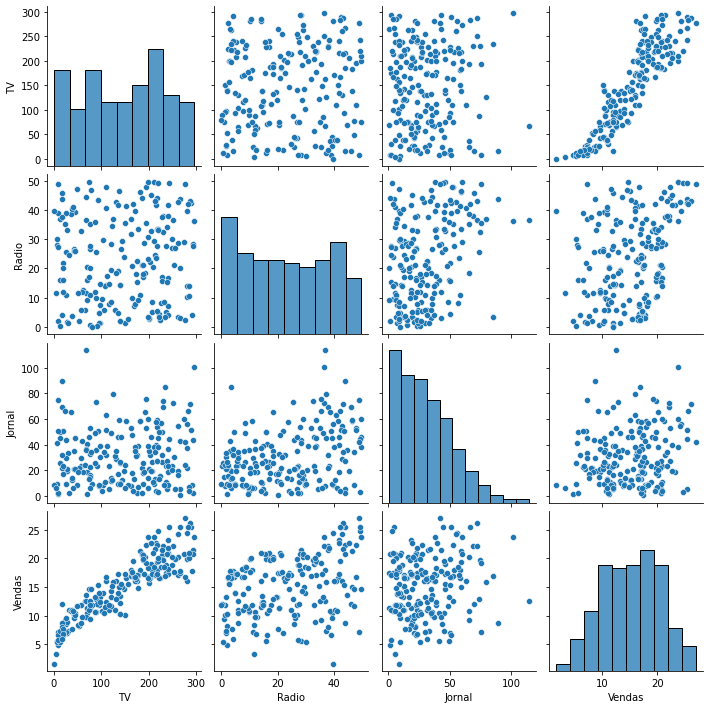

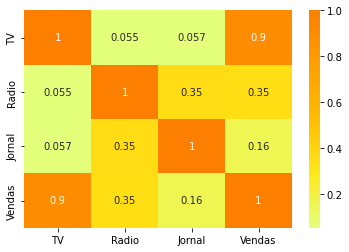

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()
sns.heatmap(df.corr(), cmap ='Wistia', annot =True)
plt.show()

### Fitting Machine Learning Model

In [3]:
from sklearn.model_selection import train_test_split
x = df.drop('Vendas', axis=1)
y = df['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Models

- LinearRegression
- RandomForest

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# fitting AI
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

### Testing and Evaluating AI

In [5]:
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
print(f"R² - Linear Regressor: {r2_lin}")
print(f"MSE - Linear Regressor: {mse_lin}")
r2_rf= metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
print(f"R² - Random Forest: {r2_rf}")
print(f"MSE - Random Forest: {mse_rf}")

R² - Linear Regressor: 0.9071151423684273
MSE - Linear Regressor: 2.3706599712256566
R² - Random Forest: 0.9637006544535097
MSE - Random Forest: 0.9264524666666684


### Visualizing the Predictions (graphic)

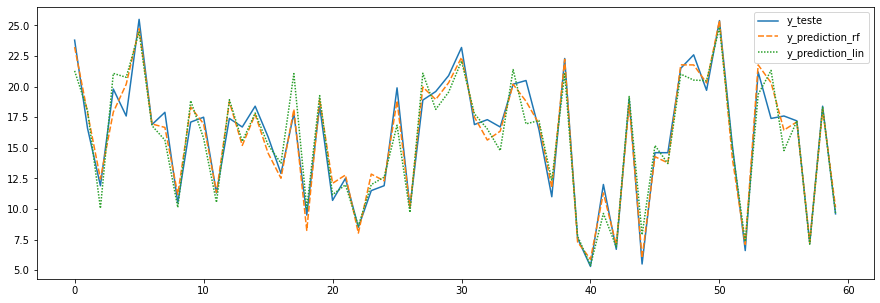

,y_teste,y_prediction_rf,y_prediction_lin
0,23.8,23.234,21.288161
1,16.6,17.870,18.042132
2,11.9,12.463,10.059590
3,19.8,17.917,21.082241
4,17.6,20.193,20.764760
5,25.5,24.733,24.471874
6,16.9,16.946,16.806436
7,17.9,16.666,15.628857
8,10.5,11.184,10.124799
9,17.1,18.327,18.846019


In [6]:
df_result = pd.DataFrame()

df_result['y_teste'] = y_test
df_result['y_prediction_rf'] = test_pred_rf
df_result['y_prediction_lin'] = test_pred_lin
# display(df_result)

df_result = df_result.reset_index(drop=True)
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_result)
plt.show()
display(df_result)

### Importance of each variable for sales

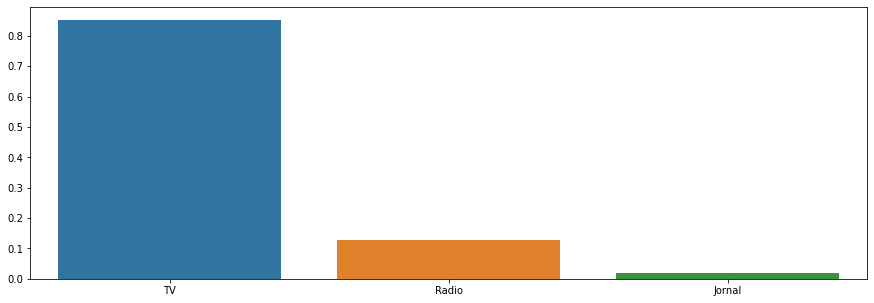

In [7]:
plt.figure(figsize=(15, 5))
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()

### Predicting New Values

In [8]:
#k = np.array([[100, 20, 30]])
#test_pred_rf = rf_reg.predict(k)
#print(test_pred_rf)

In [9]:
x["Vendas"] = y
x.to_csv("vendas.csv")

In [10]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_reg, f)
    print('Pickling Completed')

Pickling Completed
